##SCRAPPING DATA

In [1]:
!pip install google-play-scraper
!pip install Sastrawi

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk

from typing import List
from pandas import DataFrame
from wordcloud import WordCloud
from google_play_scraper import app
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from text_analysis import TextAnalysis
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


import nltk
nltk.download('stopwords')
nltk.download('punkt')




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'app.bpjs.mobile',
    lang='id', # defaults 'en'
    country='id', # defaults 'us'
    sort=Sort.NEWEST, # defaults : Sort.MOST_RELEVANT,  menggunakan Sort.NEWEST untuk dapat reviewa terbaru
    count=5000, # defaults to 100
    filter_score_with=None) # defaults: None(Semua skor (1-5)), gunakan1, 2, 3, 4 atau 5 untuk mendapatkan kriteria Skor)

In [3]:
#masukan ke data frame
df_mobile = pd.DataFrame(np.array(result),columns=['review'])
df_mobile = df_mobile.join(pd.DataFrame(df_mobile.pop('review').tolist()))
df_mobile

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1a90f720-ab81-43c8-b1f7-6688778ae08d,Dendi Honda Serang,https://play-lh.googleusercontent.com/a-/ALV-U...,Good aplikasi mudah di gunakan,5,0,None,2024-02-10 06:36:13,None,NaT,None
1,09c36c5d-040f-48e5-a414-41c12f54be14,Alista Humaira,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus,5,0,4.7.0,2024-02-10 06:28:24,None,NaT,4.7.0
2,1a0b3980-162b-4145-90b6-138ad81f1974,M,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat membantu,5,0,4.7.0,2024-02-10 06:24:09,None,NaT,4.7.0
3,24176048-e450-4aaa-a3a4-37c568cf9619,Sholehatun Naimah,https://play-lh.googleusercontent.com/a/ACg8oc...,Siip,5,0,4.7.0,2024-02-10 06:12:00,None,NaT,4.7.0
4,1bac8b98-1a92-4dc8-93a6-0fd149cb40c4,Ratna Miga Lestari,https://play-lh.googleusercontent.com/a/ACg8oc...,Good. Bisa ubah faskes lewat aplikasi skrg. Ta...,5,0,4.7.0,2024-02-10 05:58:11,None,NaT,4.7.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,6c0e539a-8712-4989-b479-b5523266afc2,guntur adhi pamungkas,https://play-lh.googleusercontent.com/a/ACg8oc...,Ok,5,0,4.7.0,2024-01-11 12:56:35,None,NaT,4.7.0
4996,82638f3f-fdce-4fe1-a9ec-c2ecec4d621c,Nova Riana,https://play-lh.googleusercontent.com/a-/ALV-U...,kenapa kok ada notif harus di root. aplikasiny...,1,0,4.7.0,2024-01-11 12:54:40,None,NaT,4.7.0
4997,bc68d6f8-ae68-48bd-8e1d-c830f438a2f3,Parlin Duta,https://play-lh.googleusercontent.com/a/ACg8oc...,Ok,3,0,4.7.0,2024-01-11 12:52:38,None,NaT,4.7.0
4998,3e2f951f-785f-4324-aab5-d286f9f22a3a,Ulung Siswandaru,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi tidak berguna, jangan download cuma r...",1,0,4.7.0,2024-01-11 12:50:33,None,NaT,4.7.0


In [ ]:
#Simpan data ke csv
#df_mobile.to_csv("scrapped_mobile_jkn5.csv", index=False)

##LABELING DATA

In [4]:
#Membaca scrapped data yang sudah di simpan
#df = pd.read_csv("scrapped_mobile_jkn5.csv")
df_jkn = df_mobile[['content','score']].copy()
df_jkn.info()
df_jkn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5000 non-null   object
 1   score    5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


,content,score
0,Good aplikasi mudah di gunakan,5
1,Bagus,5
2,Sangat membantu,5
3,Siip,5
4,Good. Bisa ubah faskes lewat aplikasi skrg. Ta...,5
...,...,...
4995,Ok,5
4996,kenapa kok ada notif harus di root. aplikasiny...,1
4997,Ok,3
4998,"Aplikasi tidak berguna, jangan download cuma r...",1


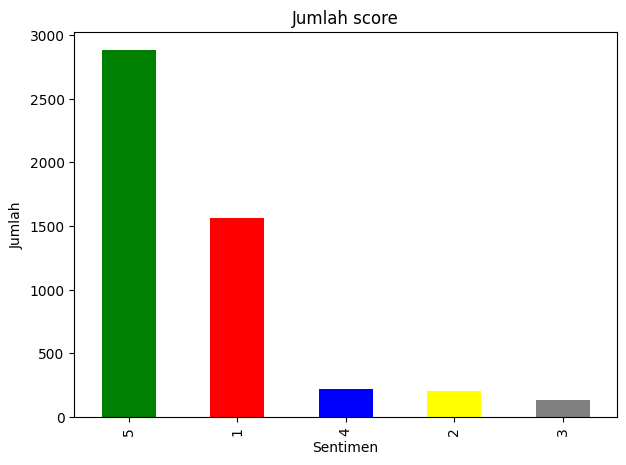

In [5]:
fig = plt.figure(figsize=(7,5))
color = ['green','red','blue','yellow', 'gray']
df_jkn['score'].value_counts().plot(kind='bar',color = color)
plt.title('Jumlah score')
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.grid(False)
plt.show()

In [6]:
# menambah kolom sentimen. Sentimen analisa berdaasrkan rating (1&2 = Negatif, 3 = Netral dan 4&5: Positif)
sentimen = []
for index, row in df_jkn.iterrows():
  if row['score'] > 3 :
    sentimen.append('Positif')
  elif row['score'] == 3 :
    sentimen.append('Netral')
  else :
    sentimen.append('Negatif')
df_jkn['sentimen'] = sentimen
df_jkn.head()

,content,score,sentimen
0,Good aplikasi mudah di gunakan,5,Positif
1,Bagus,5,Positif
2,Sangat membantu,5,Positif
3,Siip,5,Positif
4,Good. Bisa ubah faskes lewat aplikasi skrg. Ta...,5,Positif


In [ ]:
df_jkn['sentimen'].value_counts()

Positif    3094
Negatif    1773
Netral      133
Name: sentimen, dtype: int64

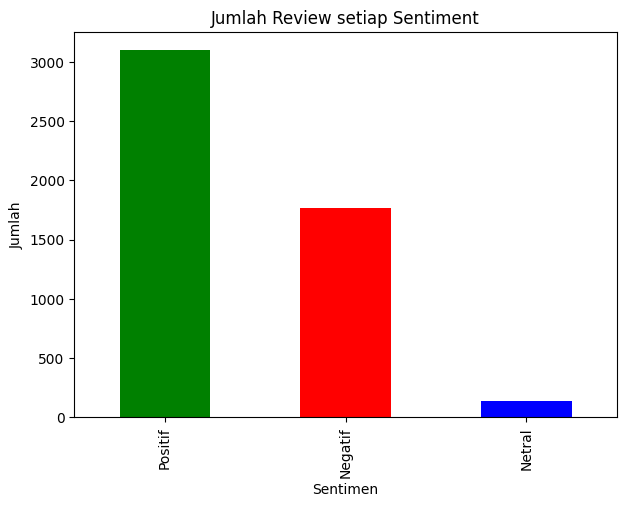

In [7]:
#Distribusi Sentimen
fig = plt.figure(figsize=(7,5))
color = ['green','red','blue']
df_jkn['sentimen'].value_counts().plot(kind='bar',color = color)
plt.title('Jumlah Review setiap Sentiment')
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.grid(False)
plt.show()

##Pembersihan data

In [8]:
#Mengubah teks menjadi huruf kecil
df_jkn['content'] = df_jkn['content'].str.lower()

In [9]:
#Menghapus URL
df_jkn['content'] = df_jkn['content'].str.replace('https\S+', ' ', case=False)

<ipython-input-9-011b15c39e4a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_jkn['content'] = df_jkn['content'].str.replace('https\S+', ' ', case=False)


In [10]:
#Menghapus mension
df_jkn['content'] = df_jkn['content'].str.replace('@\S+', ' ', case=False)

<ipython-input-10-a051cdfb13ec>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_jkn['content'] = df_jkn['content'].str.replace('@\S+', ' ', case=False)


In [11]:
#Menghapus hastag
df_jkn['content'] = df_jkn['content'].str.replace('#\S+', ' ', case=False)

<ipython-input-11-39d268f37b1c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_jkn['content'] = df_jkn['content'].str.replace('#\S+', ' ', case=False)


In [12]:
#Menghapus nest carakter
df_jkn['content'] = df_jkn['content'].str.replace("\'\w+", ' ', case=False)

<ipython-input-12-5827ecfc31e8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_jkn['content'] = df_jkn['content'].str.replace("\'\w+", ' ', case=False)


In [13]:
#Menghapus tanda baca
df_jkn['content'] = df_jkn['content'].str.replace("[^\w\s]", ' ', case=False)

<ipython-input-13-68c720caec17>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_jkn['content'] = df_jkn['content'].str.replace("[^\w\s]", ' ', case=False)


In [14]:
#menghapus extra white
df_jkn['content'] = df_jkn['content'].str.replace("\s(2)", ' ', case=False)

<ipython-input-14-329fbd6e89b3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_jkn['content'] = df_jkn['content'].str.replace("\s(2)", ' ', case=False)


##TOKENIZE DATA

In [15]:
#Import Word_tokenize
from nltk.tokenize import word_tokenize

In [16]:
#Import RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df_jkn['content_token']=df_jkn['content'].apply(regexp.tokenize)
df_jkn


,content,score,sentimen,content_token
0,good aplikasi mudah di gunakan,5,Positif,"[good, aplikasi, mudah, di, gunakan]"
1,bagus,5,Positif,[bagus]
2,sangat membantu,5,Positif,"[sangat, membantu]"
3,siip,5,Positif,[siip]
4,good bisa ubah faskes lewat aplikasi skrg ta...,5,Positif,"[good, bisa, ubah, faskes, lewat, aplikasi, sk..."
...,...,...,...,...
4995,ok,5,Positif,[ok]
4996,kenapa kok ada notif harus di root aplikasiny...,1,Negatif,"[kenapa, kok, ada, notif, harus, di, root, apl..."
4997,ok,3,Netral,[ok]
4998,aplikasi tidak berguna jangan download cuma r...,1,Negatif,"[aplikasi, tidak, berguna, jangan, download, c..."


In [17]:
#import stopwords
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("indonesian")
# Extend own custom stopwords
my_stopwords = ["jkn", "nya","aplikasi", "app", "nya", "yg", "ya", "bank", "jenius", "neo", "raya", "tmrw",
                 "dbs", "line bank", "linebank", "livin", "wokee", "seabank", "jago", "blu", "yng",
                 'aolikasi', 'apliksix', 'aja', 'apk', 'apps', 'dgn', 'ane', 'sy', 'gua', 'gwa', 'si',
                 'smpai', 'bgt', 'banget', 'bangettt', 'tu', 'ama', 'utk', 'udh', 'btw', 'ntar', 'lol',
                 'ttg', 'emg', 'aj', 'tll', 'sih', 'kalo', 'klo', 'trsa', 'mnrt', 'nih', 'ma', 'dr', 'ajaa',
                 'tp', 'akan', 'bs', 'bikin', 'kta', 'pas', 'pdahl', 'bnyak', 'guys', 'tnx', 'bang', 'nang',
                 'mas', 'amat', 'tjoy', 'hemm', 'haha', 'sllu', 'hrs', 'lanjut', 'bgtu', 'sbnrnya', 'trjadi',
                 'pdhl', 'sm', 'plg', 'skrg', 'ny', 'bca', 'mandiri', 'bri', 'btpn', 'dbs', 'brimo']
stopwords.extend(my_stopwords)


In [18]:
#Menambah kolom hasil token
df_jkn['content_token'] = df_jkn['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df_jkn

,content,score,sentimen,content_token
0,good aplikasi mudah di gunakan,5,Positif,"[good, mudah]"
1,bagus,5,Positif,[bagus]
2,sangat membantu,5,Positif,[membantu]
3,siip,5,Positif,[siip]
4,good bisa ubah faskes lewat aplikasi skrg ta...,5,Positif,"[good, ubah, faskes, vua, tlf]"
...,...,...,...,...
4995,ok,5,Positif,[ok]
4996,kenapa kok ada notif harus di root aplikasiny...,1,Negatif,"[notif, root, aplikasinya, gimana, tolong, pem..."
4997,ok,3,Netral,[ok]
4998,aplikasi tidak berguna jangan download cuma r...,1,Negatif,"[berguna, download, rugi, kuota, gk, bsa, daft..."


##STEMMING SASTRAWI

In [19]:
# install Sastrawi package
!pip install Sastrawi

In [20]:
# import StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [21]:
#Menambah kolom hasil stemming
df_jkn['stemmed'] = df_jkn['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df_jkn

,content,score,sentimen,content_token,stemmed
0,good aplikasi mudah di gunakan,5,Positif,"[good, mudah]","[good, mudah]"
1,bagus,5,Positif,[bagus],[bagus]
2,sangat membantu,5,Positif,[membantu],[bantu]
3,siip,5,Positif,[siip],[siip]
4,good bisa ubah faskes lewat aplikasi skrg ta...,5,Positif,"[good, ubah, faskes, vua, tlf]","[good, ubah, faskes, vua, tlf]"
...,...,...,...,...,...
4995,ok,5,Positif,[ok],[ok]
4996,kenapa kok ada notif harus di root aplikasiny...,1,Negatif,"[notif, root, aplikasinya, gimana, tolong, pem...","[notif, root, aplikasi, gimana, tolong, perint..."
4997,ok,3,Netral,[ok],[ok]
4998,aplikasi tidak berguna jangan download cuma r...,1,Negatif,"[berguna, download, rugi, kuota, gk, bsa, daft...","[guna, download, rugi, kuota, gk, bsa, daftar,..."


In [28]:
#menghilangkan kata yang terdiri dari 1 dan 2 huruf pada kolom text string
df_jkn['text_string'] = df_jkn['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df_jkn

,content,score,sentimen,content_token,stemmed,text_string
0,good aplikasi mudah di gunakan,5,Positif,"[good, mudah]","[good, mudah]",good mudah
1,bagus,5,Positif,[bagus],[bagus],bagus
2,sangat membantu,5,Positif,[membantu],[bantu],bantu
3,siip,5,Positif,[siip],[siip],siip
4,good bisa ubah faskes lewat aplikasi skrg ta...,5,Positif,"[good, ubah, faskes, vua, tlf]","[good, ubah, faskes, vua, tlf]",good ubah faskes vua tlf
...,...,...,...,...,...,...
4995,ok,5,Positif,[ok],[ok],
4996,kenapa kok ada notif harus di root aplikasiny...,1,Negatif,"[notif, root, aplikasinya, gimana, tolong, pem...","[notif, root, aplikasi, gimana, tolong, perint...",notif root aplikasi gimana tolong perintah per...
4997,ok,3,Netral,[ok],[ok],
4998,aplikasi tidak berguna jangan download cuma r...,1,Negatif,"[berguna, download, rugi, kuota, gk, bsa, daft...","[guna, download, rugi, kuota, gk, bsa, daftar,...",guna download rugi kuota bsa daftar tay hapus ...


In [ ]:
#simpan data hasil stemmed
#df_jkn.to_csv('mobile_jkn_stemmed.csv')

##WORD CLAUDE

In [29]:
#Install wordcloud
#!pip install wordcloud

WORDS CLAUDE POSITIF

In [30]:
# Buat data Sentimen Positif
df_p=df_jkn[df_jkn['sentimen']=='Positif']
df_p


,content,score,sentimen,content_token,stemmed,text_string
0,good aplikasi mudah di gunakan,5,Positif,"[good, mudah]","[good, mudah]",good mudah
1,bagus,5,Positif,[bagus],[bagus],bagus
2,sangat membantu,5,Positif,[membantu],[bantu],bantu
3,siip,5,Positif,[siip],[siip],siip
4,good bisa ubah faskes lewat aplikasi skrg ta...,5,Positif,"[good, ubah, faskes, vua, tlf]","[good, ubah, faskes, vua, tlf]",good ubah faskes vua tlf
...,...,...,...,...,...,...
4990,kenapa jkn ku engga bisa dibuka,5,Positif,"[ku, engga, dibuka]","[ku, engga, buka]",engga buka
4991,ok,5,Positif,[ok],[ok],
4992,dengan ini llayanan kesehatan akan lebih diper...,5,Positif,"[llayanan, kesehatan, dipermudah]","[llayanan, sehat, mudah]",llayanan sehat mudah
4993,bagus,5,Positif,[bagus],[bagus],bagus


In [31]:
all_words_lem = ' '.join([word for word in df_p['text_string']])

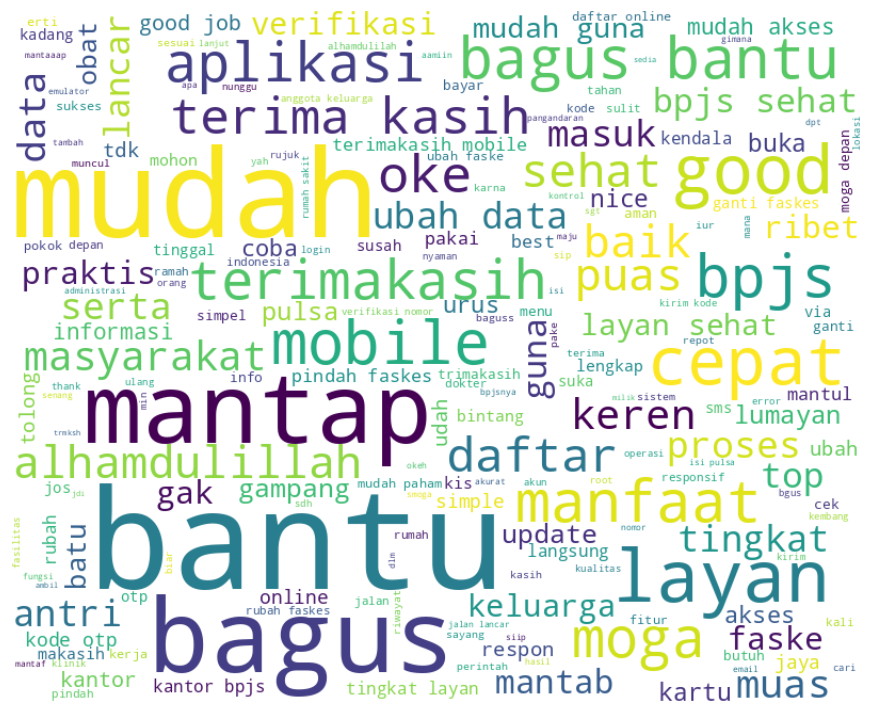

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=650, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(13, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

WORDS CLAUDE NEGATIF

In [33]:
# Buat data Sentimen Positif
df_neg=df_jkn[df_jkn['sentimen']=='Negatif']
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])
df_neg

,content,score,sentimen,content_token,stemmed,text_string
6,tidak bisa dibuka padahal kondisi hp tidak di ...,1,Negatif,"[dibuka, kondisi, hp, root, emulator]","[buka, kondisi, hp, root, emulator]",buka kondisi root emulator
8,tolong dong fitur gpsnya dibenahin lagi soal m...,1,Negatif,"[tolong, fitur, gpsnya, dibenahin, nyari, fask...","[tolong, fitur, gpsnya, dibenahin, nyari, fask...",tolong fitur gpsnya dibenahin nyari faskes ajj...
11,setelah diinstal pas masuk menu pendaftaran g...,1,Negatif,"[diinstal, masuk, menu, pendaftaran, gk, dibuka]","[diinstal, masuk, menu, daftar, gk, buka]",diinstal masuk menu daftar buka
20,saya baru instal aplikasi ini terus mau masuk...,1,Negatif,"[instal, masuk, mendaftar, kali, masuk, no, hp...","[instal, masuk, daftar, kali, masuk, no, hp, m...",instal masuk daftar kali masuk muncul tulis se...
22,aplikasi tidak bekerja dengan baik muncul per...,1,Negatif,"[muncul, peringatan, apliksi, terbuka, mohon, ...","[muncul, ingat, apliksi, buka, mohon, baik]",muncul ingat apliksi buka mohon baik
...,...,...,...,...,...,...
4988,mantap,1,Negatif,[mantap],[mantap],mantap
4994,otp lama sekali gk muncul muncul,1,Negatif,"[otp, gk, muncul, muncul]","[otp, gk, muncul, muncul]",otp muncul muncul
4996,kenapa kok ada notif harus di root aplikasiny...,1,Negatif,"[notif, root, aplikasinya, gimana, tolong, pem...","[notif, root, aplikasi, gimana, tolong, perint...",notif root aplikasi gimana tolong perintah per...
4998,aplikasi tidak berguna jangan download cuma r...,1,Negatif,"[berguna, download, rugi, kuota, gk, bsa, daft...","[guna, download, rugi, kuota, gk, bsa, daftar,...",guna download rugi kuota bsa daftar tay hapus ...


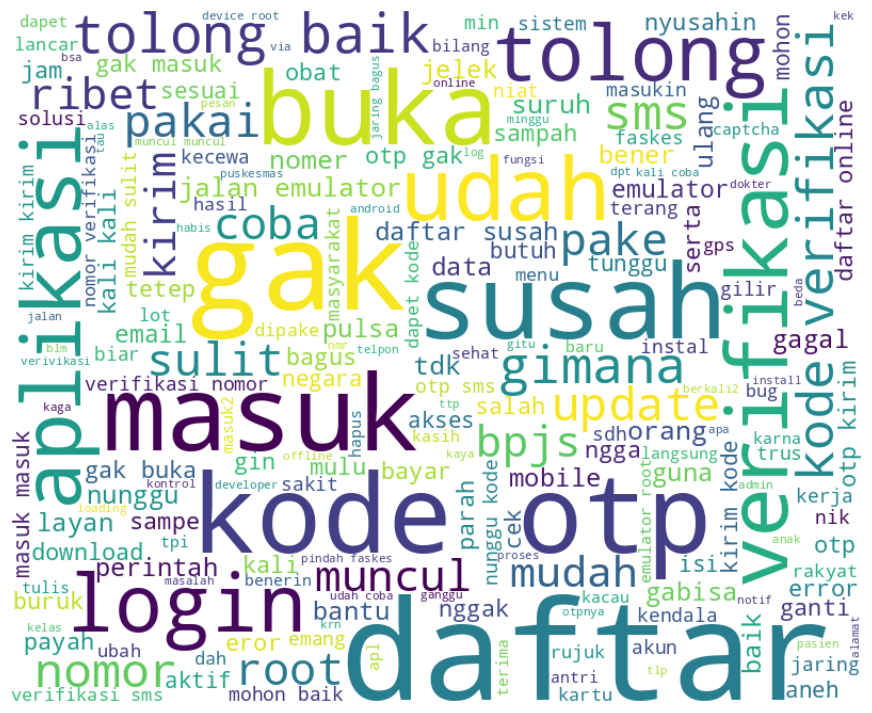

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=650, random_state=21, max_font_size=130).generate(all_words_lemneg)

plt.figure(figsize=(13, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## N - GRAMS

In [35]:
#Import TextAnalysis
from text_analysis import TextAnalysis

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
#Import word_tokenize dan FreqDist
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def word_frequency(data:DataFrame):
  _ = pd.DataFrame()
  _['token'] = data.apply(lambda x: word_tokenize(str(x)))
  tokens = [word for sentence in _['token'] for word in sentence] #data flatening
  token_freq = FreqDist(tokens)
  most_common_words = token_freq.most_common(100)
  return most_common_words

for items in word_frequency(df_neg["text_string"]):
  print(items)

('daftar', 464)
('gak', 402)
('kode', 392)
('otp', 350)
('masuk', 301)
('verifikasi', 288)
('susah', 251)
('buka', 222)
('tolong', 210)
('baik', 196)
('kirim', 184)
('udah', 156)
('nomor', 154)
('emulator', 138)
('sms', 138)
('kali', 136)
('coba', 119)
('aplikasi', 115)
('login', 113)
('sulit', 108)
('root', 107)
('muncul', 103)
('mudah', 100)
('gimana', 97)
('jalan', 96)
('update', 84)
('bpjs', 84)
('pakai', 81)
('nunggu', 79)
('pake', 76)
('ribet', 72)
('nomer', 70)
('bagus', 65)
('data', 64)
('orang', 63)
('suruh', 61)
('tdk', 60)
('mobile', 60)
('online', 57)
('mohon', 55)
('ulang', 54)
('faskes', 53)
('guna', 53)
('bantu', 53)
('gagal', 52)
('email', 51)
('bener', 51)
('gin', 51)
('perintah', 50)
('layan', 49)
('jelek', 49)
('pulsa', 48)
('gabisa', 46)
('bayar', 44)
('ganti', 44)
('salah', 42)
('jaring', 41)
('antri', 41)
('buruk', 40)
('masukin', 40)
('nyusahin', 40)
('error', 40)
('eror', 39)
('nggak', 38)
('tetep', 38)
('payah', 38)
('serta', 37)
('dapet', 37)
('sampe', 36)
('s

In [40]:
#import Ngrams
from nltk import ngrams
analysis = TextAnalysis()
ngrams_2 = analysis.ngram_dist(df_neg['text_string'])
for items in ngrams_2:
  print(items)


In [41]:
def ngram_dist(data:DataFrame, n_grams = 2):
    tokens = data.apply(lambda x: word_tokenize(str(x)))
    _ = [word for sentence in tokens for word in sentence]
    result = ngrams(_,n_grams)
    token_freq = FreqDist(result)
    most_ngram = token_freq.most_common(150)
    return most_ngram

In [ ]:
ngram_dist(df_neg['text_string'])

[(('kode', 'otp'), 215),
 (('tolong', 'baik'), 104),
 (('kode', 'verifikasi'), 95),
 (('jalan', 'emulator'), 65),
 (('aja', 'susah'), 42),
 (('gak', 'masuk'), 38),
 (('aplikasi', 'gak'), 37),
 (('daftar', 'aja'), 37),
 (('otp', 'kirim'), 37),
 (('otp', 'gak'), 37),
 (('gak', 'buka'), 35),
 (('bikin', 'aplikasi'), 33),
 (('kali', 'kali'), 33),
 (('daftar', 'online'), 32),
 (('susah', 'banget'), 31),
 (('kirim', 'kode'), 30),
 (('buka', 'aplikasi'), 29),
 (('masuk', 'masuk'), 28),
 (('aplikasi', 'buka'), 27),
 (('verifikasi', 'nomor'), 27),
 (('kirim', 'kirim'), 26),
 (('daftar', 'susah'), 26),
 (('mudah', 'sulit'), 26),
 (('nunggu', 'kode'), 25),
 (('otp', 'masuk'), 24),
 (('aplikasi', 'jalan'), 22),
 (('gimana', 'sih'), 22),
 (('baik', 'aplikasi'), 22),
 (('otp', 'sms'), 22),
 (('verifikasi', 'sms'), 21),
 (('masuk', 'aplikasi'), 21),
 (('mohon', 'baik'), 21),
 (('nomor', 'verifikasi'), 21),
 (('aplikasi', 'sampah'), 21),
 (('dapet', 'kode'), 20),
 (('aplikasi', 'perintah'), 20),
 (('d

In [42]:
def ngram_dist(data:DataFrame, n_grams = 3):
    tokens = data.apply(lambda x: word_tokenize(str(x)))
    _ = [word for sentence in tokens for word in sentence]
    result = ngrams(_,n_grams)
    token_freq = FreqDist(result)
    most_ngram = token_freq.most_common(150)
    return most_ngram

In [43]:
ngram_dist(df_neg['text_string'])

[(('kode', 'otp', 'gak'), 27),
 (('kode', 'otp', 'kirim'), 26),
 (('kirim', 'kode', 'otp'), 23),
 (('dapet', 'kode', 'otp'), 16),
 (('nunggu', 'kode', 'otp'), 14),
 (('daftar', 'kode', 'otp'), 12),
 (('susah', 'kode', 'otp'), 11),
 (('kode', 'otp', 'sms'), 11),
 (('kode', 'verifikasi', 'sms'), 10),
 (('kode', 'otp', 'masuk'), 9),
 (('otp', 'kirim', 'kirim'), 9),
 (('otp', 'gak', 'masuk'), 9),
 (('gak', 'masuk', 'masuk'), 9),
 (('daftar', 'susah', 'kode'), 8),
 (('verifikasi', 'kode', 'otp'), 8),
 (('kode', 'verifikasi', 'kirim'), 8),
 (('mobile', 'jalan', 'emulator'), 8),
 (('kode', 'otp', 'susah'), 8),
 (('kode', 'otp', 'muncul'), 8),
 (('udah', 'coba', 'kali'), 7),
 (('susah', 'dapet', 'kode'), 7),
 (('kode', 'verifikasi', 'nomor'), 7),
 (('kode', 'verifikasi', 'masuk'), 7),
 (('kali', 'kali', 'coba'), 7),
 (('kode', 'otp', 'daftar'), 7),
 (('tolong', 'baik', 'sistem'), 7),
 (('kode', 'verifikasi', 'gak'), 7),
 (('gak', 'kode', 'verifikasi'), 7),
 (('jalan', 'emulator', 'tolong'), 6)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
#import warnings

#import re
#warnings.filterwarnings('ignore')


In [ ]:
#membaca data yang telah di stemmed
df = pd.read_csv('mobile_jkn_stemmed.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'mobile_jkn_stemmed.csv'

In [45]:
#Penetapan X dan Y
X = df_jkn['text_string']
y = df_jkn['score']

TF IDF

In [46]:
#Penerapan TF IDF
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

SMOOTING

In [47]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

##Modeling

##Model 90% data traning dan 10 % data test

In [48]:
#Set 90% data traning dan 10% data test
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)

In [49]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8029146426092991

In [50]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7258848022206801

In [51]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8563497571131159

##Model 80 % data traning dan 20 % data test

In [52]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=3)

In [53]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.808746962860118

In [54]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7209302325581395

In [55]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8562998958694897

##Model 70 % data traning dan 30 % data test

In [56]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.3,random_state=3)

In [57]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8079592781119852

In [58]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7019898195279963

In [59]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8498380379453957

##Model 60 % data traning dan 40 % data test

In [60]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.4,random_state=3)

In [61]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.7959041999305797

In [62]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7113849357861853

In [63]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8443248871919472

##Model 50 % data traning dan 50 % data test

In [64]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.5,random_state=3)

In [65]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.7931417464945162

In [66]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.6960988477023462

In [67]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.839927807857837

##Model 40 % data traning dan 60 % data test

In [68]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.6,random_state=3)

In [69]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.7753094990165452

In [70]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.6714103899109105

In [71]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8230938331597825

##Model 30 % data traning dan 70 % data test

In [72]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.7,random_state=3)

In [73]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.756743355811186

In [74]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.6678897262990877

In [75]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8009718365727886

##Model 20 % data traning dan 80 % data test

In [76]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.8,random_state=3)

In [77]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.7014057618882332

In [78]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.5906803193335647

In [79]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.7486983686220062

##Model 10 % data traning dan 90 % data test

In [80]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.9,random_state=3)

In [81]:
#SVM
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.6471268800617046

In [82]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.49749325106054765

In [83]:
# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.6590050134978789

In [84]:
#Inisiasi hasil lists
akurasi = [[90,10,80.29,72.57,85.63],[80,20,80.87,72.09,85.62],[70,30,80.79,70.19,84.98],[60,40,79.59,71.13,84.43],[50,50,79.31,69.60,83.99],[40,60,79.59,71.13,84.43],[30,70,75.64,66.78,80.09],[20,80,70.14,59.06,74.86],[10,90,64.71,49.74,65.90]]

#Membuat data frame
df_hasil = pd.DataFrame(akurasi, columns=['data_train', 'data_tes', 'SVM', 'Naive', 'R_Forest'])
df_hasil

,data_train,data_tes,SVM,Naive,R_Forest
0,90,10,80.29,72.57,85.63
1,80,20,80.87,72.09,85.62
2,70,30,80.79,70.19,84.98
3,60,40,79.59,71.13,84.43
4,50,50,79.31,69.60,83.99
5,40,60,79.59,71.13,84.43
6,30,70,75.64,66.78,80.09
7,20,80,70.14,59.06,74.86
8,10,90,64.71,49.74,65.90


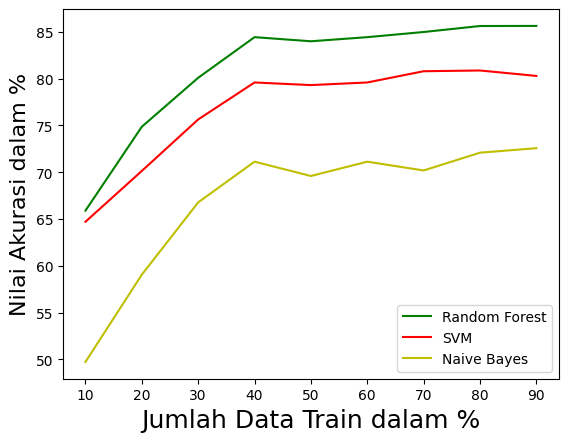

In [85]:
plt.plot(df_hasil['data_train'], df_hasil['R_Forest'], 'g', label='Random Forest')
plt.plot(df_hasil['data_train'], df_hasil['SVM'], 'r', label='SVM')
plt.plot(df_hasil['data_train'], df_hasil['Naive'], 'y', label='Naive Bayes')
plt.xlabel('Jumlah Data Train dalam %', fontsize=18)
plt.ylabel('Nilai Akurasi dalam %', fontsize=16)
plt.legend()
plt.show()